# Import libraries and data

In [2]:
import numpy as np
import pandas as pd
import sys
import scanpy as sc
import anndata as ann
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import logging
import os
from plotnine import *
import plotnine
import scipy.io
import seaborn as sns

sc.settings.verbosity = 3
sc.logging.print_version_and_date()

Running Scanpy 1.7.2, on 2021-08-09 14:51.


In [3]:
cd /mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/

/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data


In [4]:
#get all directories containing matrix,barcodes and features for anndata and sample names
path_list=[]
directory_name=[]
path='/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45'
for root,d_names,f_names in os.walk(path):
    if root.endswith('filtered_feature_bc_matrix'):
        path_list.append(root)
        name=root.split('/')[8]
        directory_name.append(name)

In [5]:
late_list=['COMET_1072_CD45_Day10',
           'COMET_1154_CD45_Day13',
           'COMET_1233_CD45_Day0',
           'COMET_1264_CD45_Day14','COMET_1271_CD45_Day16',
'COMET_1290_CD45_Day7', 'COMET_1320_CD45_Day13','COMET_1357_CD45_Day7']

In [6]:
early_list =['COMET_1047_CD45_Day2',
'COMET_1154_CD45_Day6',
'COMET_1357_CD45_Day2',
'COMET_1001_CD45_Day0',
'COMET_1002_CD45_Day0',
'COMET_1072_CD45_Day4','COMET_1115_CD45_Day6','COMET_1158_CD45_Day4','COMET_1161_CD45_Day3','COMET_1271_CD45_Day12']

In [7]:
#Ingest early timepoint patient data
early_list_path=[]

for sample in early_list:
    for path in path_list:
        split_name = path.split('/')[8]
        if sample==split_name:
            early_list_path.append(path)

In [8]:
early_list_path

['/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1047_CD45_Day2/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1154_CD45_Day6/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1357_CD45_Day2/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1001_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1002_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1072_CD45_Day4/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1115_CD45_Day6/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1158_CD45_Day4/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1161_CD45_Day3/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashle

In [9]:
#Ingest late timepoint patient data
late_list_path=[]

for sample in late_list:
    for path in path_list:
        split_name = path.split('/')[8]
        if sample==split_name:
            late_list_path.append(path)

In [10]:
late_list_path

['/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1072_CD45_Day10/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1154_CD45_Day13/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1233_CD45_Day0/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1264_CD45_Day14/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1271_CD45_Day16/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1290_CD45_Day7/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1320_CD45_Day13/filtered_feature_bc_matrix',
 '/mnt/ibm_lg/ashleyb/COVID19_Data/COMET/5_Prime_Data/CD45/COMET_1357_CD45_Day7/filtered_feature_bc_matrix']

# build adata

In [11]:
adatas_early=[sc.read_10x_mtx(path) for path in early_list_path]

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading fr

In [12]:
adatas_late=[sc.read_10x_mtx(path) for path in late_list_path]

--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.
--> This might be very slow. Consider passing `cache=True`, which enables much faster reading from a cache file.


In [13]:
#add Identity of early time point
for i in range(len(adatas_early)):
    adatas_early[i].obs['Identity'] = early_list[i]

In [14]:
#add Identity of late time point
for i in range(len(adatas_late)):
    adatas_late[i].obs['Identity']= late_list[i]

In [15]:
#add patient name to early
ID_list_early =[]
for patient in early_list:
    ID = patient.split('_')[1]
    ID_list_early.append(ID)
for i in range(len(adatas_early)):
    adatas_early[i].obs['Patient']=ID_list_early[i]

In [16]:
adatas_early[5].obs

,Identity,Patient
AAACCTGCATCTCGCT-1,COMET_1072_CD45_Day4,1072
AAACGGGAGGTGATTA-1,COMET_1072_CD45_Day4,1072
AAACGGGCAGATGAGC-1,COMET_1072_CD45_Day4,1072
AAACGGGGTGCAGACA-1,COMET_1072_CD45_Day4,1072
AAACGGGGTTCGCGAC-1,COMET_1072_CD45_Day4,1072
...,...,...
TTTGGTTAGATGCCAG-1,COMET_1072_CD45_Day4,1072
TTTGGTTAGTAGGTGC-1,COMET_1072_CD45_Day4,1072
TTTGGTTGTGTAATGA-1,COMET_1072_CD45_Day4,1072
TTTGTCACAGGACCCT-1,COMET_1072_CD45_Day4,1072


In [17]:
#add patient name to late
ID_list_late =[]
for patient in late_list:
    ID = patient.split('_')[1]
    ID_list_late.append(ID)
#for i in range(len(adatas_early)):
    #adatas_late[i].obs['Patient']=ID_list_late[i]

In [18]:
adata_merge_early = adatas_early[0].concatenate(adatas_early[1:])

In [19]:
adata_merge_late = adatas_late[0].concatenate(adatas_late[1:])

# Add metadata of bacterial infection

In [20]:
Early_Bacterial_dict ={'COMET_1047_CD45_Day2':'Yes',
'COMET_1154_CD45_Day6':'Yes',
'COMET_1357_CD45_Day2':'Yes',
'COMET_1001_CD45_Day0':'No',
'COMET_1002_CD45_Day0':'No',
'COMET_1072_CD45_Day4':'No','COMET_1115_CD45_Day6':'No','COMET_1158_CD45_Day4':'No','COMET_1161_CD45_Day3':'Yes','COMET_1271_CD45_Day12':'No'}

In [21]:
adata_merge_early.obs['VAP']=adata_merge_early.obs['Identity'].map(Early_Bacterial_dict)
#adata_merge_early.obs['VAP']=[Early_Bacterial_dict.get(x) for x in adata_merge_early.obs['Identity']]

In [22]:
Late_Bacterial_dict ={'COMET_1072_CD45_Day10':'No',         
 'COMET_1154_CD45_Day13':'Yes',
'COMET_1233_CD45_Day0':'Yes',
'COMET_1264_CD45_Day14':'Yes',
'COMET_1271_CD45_Day16':'No',                   
 'COMET_1290_CD45_Day7':'No',
 'COMET_1320_CD45_Day13':'No',
 'COMET_1357_CD45_Day7':'Yes'}

In [23]:
adata_merge_late.obs['VAP']=adata_merge_late.obs['Identity'].map(Late_Bacterial_dict)
#adata_merge_late.obs['VAP']=[Late_Bacterial_dict.get(x) for x in adata_merge_late.obs['Identity']]

In [24]:
adata_merge_early.obs['Time']='Early'

In [25]:
adata_merge_late.obs['Time']='Late'

In [26]:
adata=adata_merge_early.concatenate(adata_merge_late)

In [27]:
adata.obs

,Identity,Patient,batch,VAP,Time
AAACCTGTCAGATAAG-1-0-0,COMET_1047_CD45_Day2,1047,0,Yes,Early
AAACCTGTCGAGAGCA-1-0-0,COMET_1047_CD45_Day2,1047,0,Yes,Early
AAACGGGAGACAATAC-1-0-0,COMET_1047_CD45_Day2,1047,0,Yes,Early
AAAGATGAGAGCCTAG-1-0-0,COMET_1047_CD45_Day2,1047,0,Yes,Early
AAAGATGTCTCGTATT-1-0-0,COMET_1047_CD45_Day2,1047,0,Yes,Early
...,...,...,...,...,...
TTTGTCACAATCTGCA-1-7-1,COMET_1357_CD45_Day7,NaN,1,Yes,Late
TTTGTCACATGGTCAT-1-7-1,COMET_1357_CD45_Day7,NaN,1,Yes,Late
TTTGTCAGTGCAGACA-1-7-1,COMET_1357_CD45_Day7,NaN,1,Yes,Late
TTTGTCAGTTGAACTC-1-7-1,COMET_1357_CD45_Day7,NaN,1,Yes,Late


# Quality Control

In [28]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [29]:
mt_gene_mask = np.flatnonzero([gene.startswith('MT-') for gene in adata.var_names])
adata.obs['mt_frac'] = np.sum(adata[:, mt_gene_mask].X, axis=1).A1/adata.obs['total_counts']
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
ribo_genes = adata.var_names.str.startswith(('RPS','RPL'))
adata.obs['percent_ribo'] = np.sum(adata[:, ribo_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
sars_genes = adata.var_names.str.startswith('SARS2')
adata.obs['percent_SARS'] = np.sum(adata[:, sars_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1

... storing 'Identity' as categorical
... storing 'Patient' as categorical
... storing 'VAP' as categorical
... storing 'Time' as categorical
... storing 'feature_types' as categorical


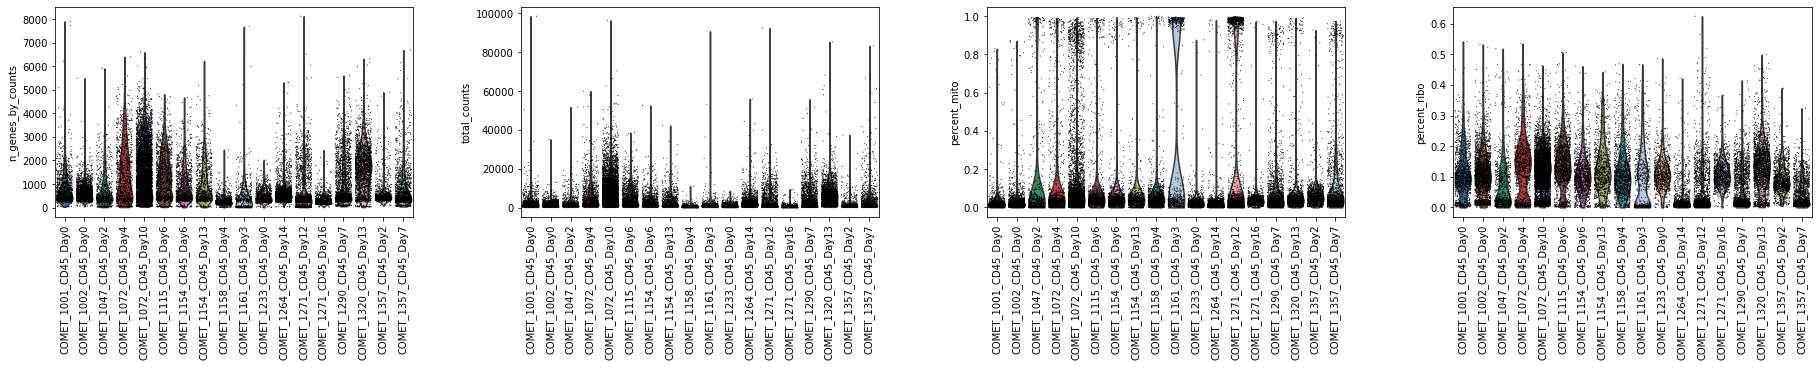

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, groupby = 'Identity', rotation = 90)

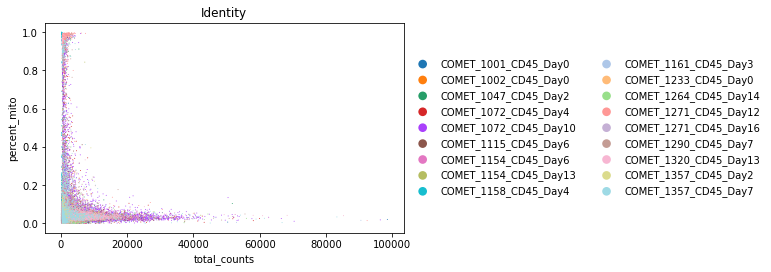

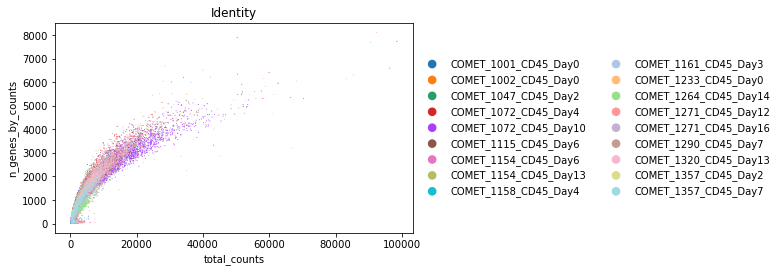

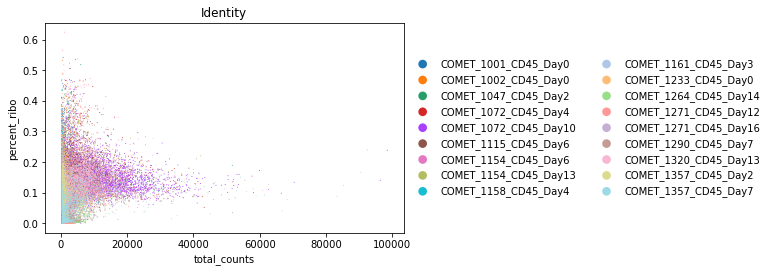

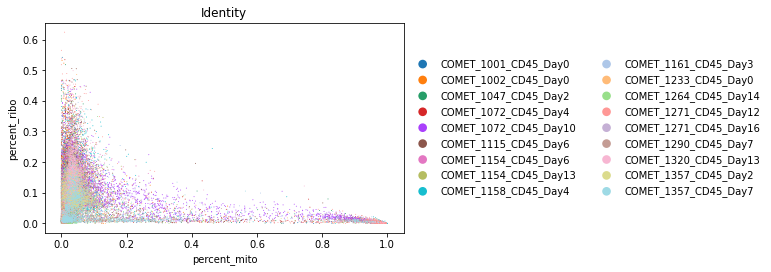

In [31]:
sc.pl.scatter(adata, x='total_counts', y='percent_mito', color="Identity")
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color="Identity")
sc.pl.scatter(adata, x='total_counts', y='percent_ribo', color="Identity")
sc.pl.scatter(adata, x='percent_mito', y='percent_ribo', color="Identity")

/data/shoshana/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/data/shoshana/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
/data/shoshana/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


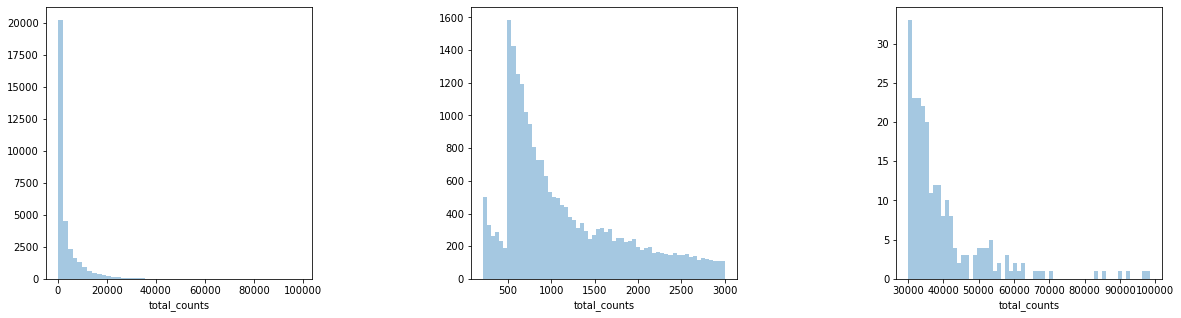

In [32]:
#In order to make a thresholding decision, take a look at the number of counts/cell
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 134)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)
sns.distplot(adata.obs['total_counts'], 
                 kde=False, #kde=false means not normalized
                 ax=fig.add_subplot(fig_ind[0]))
sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']<3000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[1]))
sns.distplot(adata.obs['total_counts'][adata.obs['total_counts']>30000], 
                 kde=False, bins=60, 
                 ax=fig.add_subplot(fig_ind[2]))
plt.show()

/data/shoshana/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


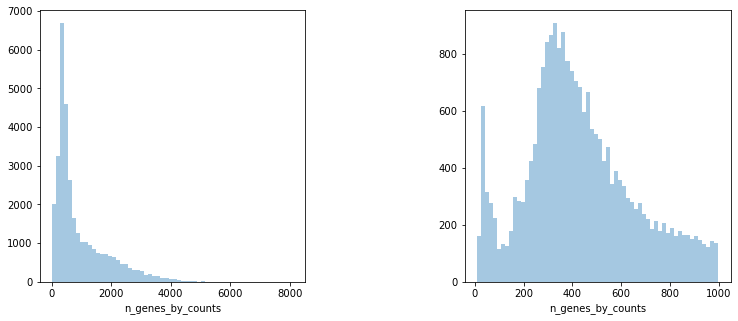

In [33]:
#Thresholding decision: genes (total genes)
rcParams['figure.figsize']=(20,5)
fig_ind=np.arange(131, 133)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6) #create a grid for subplots
sns.distplot(adata.obs['n_genes_by_counts'], kde=False, bins=60, ax=fig.add_subplot(fig_ind[0]))
sns.distplot(adata.obs['n_genes_by_counts'][adata.obs['n_genes_by_counts']<1000], 
                 kde=False, bins=60, ax=fig.add_subplot(fig_ind[1]))
plt.show()

# Filtering

In [33]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=0)
print(adata.n_obs, adata.n_vars)


filtered out 2908 cells that have less than 200 genes expressed


30622 33547


In [34]:
sc.pp.filter_cells(adata, min_counts=2500)
print('Number of cells after min count filter:{:d}'.format(adata_merge_early.n_obs))

adata_merge_early = adata[adata.obs['percent_mito'] < 0.2]
print('Number of cells after MT filter: {:d}'.format(adata.n_obs))

#took high off at 40,0000 but then it excluded only 14 cells so didn't do it per our review

filtered out 21257 cells that have less than 2500 counts


Number of cells after min count filter:14399
Number of cells after MT filter: 12273


In [35]:
adata

AnnData object with n_obs × n_vars = 12273 × 33547
    obs: 'Identity', 'Patient', 'batch', 'VAP', 'Time', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mt_frac', 'percent_mito', 'percent_ribo', 'percent_SARS', 'n_counts'
    var: 'feature_types', 'gene_ids-0-0', 'gene_ids-1-0', 'gene_ids-2-0', 'gene_ids-3-0', 'gene_ids-4-0', 'gene_ids-5-0', 'gene_ids-6-0', 'gene_ids-7-0', 'gene_ids-8-0', 'gene_ids-9-0', 'gene_ids-1', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'Identity_colors'

In [36]:
adata.obs.groupby(['Identity']).size().to_frame('count')

,count
Identity,
COMET_1001_CD45_Day0,330
COMET_1002_CD45_Day0,322
COMET_1047_CD45_Day2,201
COMET_1072_CD45_Day4,685
COMET_1072_CD45_Day10,3897
COMET_1115_CD45_Day6,930
COMET_1154_CD45_Day6,478
COMET_1154_CD45_Day13,391
COMET_1158_CD45_Day4,22


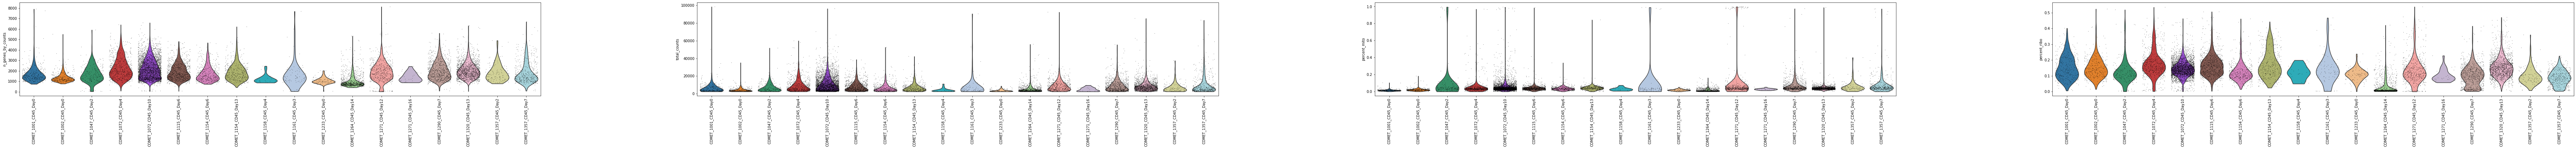

In [37]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'percent_mito','percent_ribo'],
             jitter=0.4, groupby = 'Identity', rotation = 90)

In [38]:
#remove mito genes
non_mito_genes_list = [name for name in adata.var_names if not name.startswith('MT-')]
adata = adata[:, non_mito_genes_list]

/data/shoshana/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
normalizing counts per cell
    finished (0:00:00)


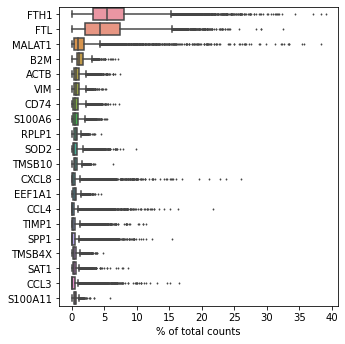

In [39]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [40]:
adata.layers["raw_counts"]=adata.X.copy()

# Normalize

In [41]:
#Normalize counts by 10,000 reads per cell
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [42]:
sc.pp.log1p(adata)

In [43]:
#before set .raw
adata.var

,feature_types,gene_ids-0-0,gene_ids-1-0,gene_ids-2-0,gene_ids-3-0,gene_ids-4-0,gene_ids-5-0,gene_ids-6-0,gene_ids-7-0,gene_ids-8-0,gene_ids-9-0,gene_ids-1,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
MIR1302-2HG,Gene Expression,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,ENSG00000243485,1,0.000030,0.000030,99.997018,1.0,0.693147
FAM138A,Gene Expression,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,ENSG00000237613,4,0.000119,0.000119,99.988070,4.0,1.609438
OR4F5,Gene Expression,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,ENSG00000186092,0,0.000000,0.000000,100.000000,0.0,0.000000
AL627309.1,Gene Expression,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,ENSG00000238009,32,0.000954,0.000954,99.904563,32.0,3.496508
AL627309.3,Gene Expression,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,ENSG00000239945,0,0.000000,0.000000,100.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SARS2_ORF7A,Gene Expression,SARS2_007,SARS2_008,SARS2_008,SARS2_007,SARS2_008,SARS2_008,SARS2_008,SARS2_008,SARS2_008,SARS2_008,SARS2_008,0,0.000000,0.000000,100.000000,0.0,0.000000
SARS2_ORF7B,Gene Expression,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,SARS2_009,1,0.000089,0.000089,99.997018,3.0,1.386294
SARS2_ORF8,Gene Expression,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,SARS2_010,5,0.000149,0.000149,99.985088,5.0,1.791759
SARS2_N,Gene Expression,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,SARS2_011,61,0.003310,0.003305,99.818073,111.0,4.718499


In [44]:
#Set the .raw attribute of AnnData object to the normalized and logarithmized raw gene expression 
#for later use in differential testing and visualizations of gene expression. 
#make copy

adata.raw = adata.copy()


In [45]:
### writing h5ad 
adata.write_h5ad('/mnt/ibm_lg/shoshana/trachasp/SZPreprocess_removesamples.h5ad')